In [1]:
import os
from pprint import pformat
import matplotlib.pyplot as plt

# EOReader
from eoreader.reader import Reader
from eoreader.bands import *
from eoreader.env_vars import DEM_PATH


In [2]:
path = os.path.join("/home", "data", "DATA", "PRODS", "LANDSATS_COL2", "LT05_L1TP_200030_20111110_20200820_02_T1.tar")
reader = Reader()
prod = reader.open(path)
prod

EOReader L5Product
Attributes:
	condensed_name: 20111110T103612_L5_200030_TM
	name: LT05_L1TP_200030_20111110_20200820_02_T1
	path: /home/data/DATA/PRODS/LANDSATS_COL2/LT05_L1TP_200030_20111110_20200820_02_T1.tar
	platform: Landsat-5
	sensor type: Optical
	product type: TM
	default resolution: 30.0
	acquisition datetime: 2011-11-10T10:36:12
	band mapping:
		BLUE: 1
		GREEN: 2
		RED: 3
		NIR: 4
		NARROW_NIR: 4
		SWIR_1: 5
		SWIR_2: 7
		THERMAL_IR_1: 6
		THERMAL_IR_2: 6
	tile name: 200030
	needs_extraction: False

In [3]:
print(
    f"Landsat tile: {prod.tile_name}\n\n"
    f"Acquisition datetime: {prod.datetime}\n\n"
    f"Existing bands:\n{pformat([band.value for band in prod.get_existing_bands()])}"
)

Landsat tile: 200030

Acquisition datetime: 2011-11-10 10:36:12

Existing bands:
['BLUE',
 'GREEN',
 'RED',
 'NIR',
 'NARROW_NIR',
 'SWIR_1',
 'SWIR_2',
 'THERMAL_IR_1',
 'THERMAL_IR_2']


In [4]:
# Retrieve the UTM CRS of the tile
prod.crs()

CRS.from_epsg(32630)

<AxesSubplot:>

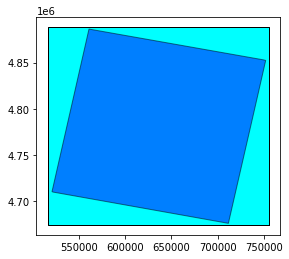

In [5]:
# Open here some more interesting geographical data: extent and footprint
extent = prod.extent()
footprint = prod.footprint()
base = extent.plot(color='cyan', edgecolor='black')
footprint.plot(ax=base, color='blue', edgecolor='black', alpha=0.5)

In [6]:
# Select some bands you want to load
bands = [GREEN, NDVI, YELLOW, CLOUDS]

# Compute DEM band only if you have set a DEM in your environment path
if DEM_PATH in os.environ:
    bands.append(HILLSHADE)

# Be sure they exist for Landsat-5 TM sensor:
ok_bands = [band for band in bands if prod.has_band(band)]
print(to_str(ok_bands))  # Landsat-5 TM doesn't provide YELLOW band

['GREEN', 'NDVI', 'CLOUDS']


In [7]:
# Load those bands as a dict of xarray.DataArray
band_dict = prod.load(ok_bands)
band_dict[GREEN]

<xarray.DataArray 'GREEN' (band: 1, y: 7131, x: 7991)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 5.16e+05 5.16e+05 5.161e+05 ... 7.557e+05 7.557e+05
  * y            (y) float64 4.888e+06 4.888e+06 ... 4.674e+06 4.674e+06
    spatial_ref  int64 0
Attributes:
    long_name:         GREEN
    sensor:            Landsat-5
    sensor_id:         L5
    product_path:      /home/data/DATA/PRODS/LANDSATS_COL2/LT05_L1TP_200030_2...
    product_name:      LT05_L1TP_200030_20111110_20200820_02_T1
    product_filename:  LT05_L1TP_200030_20111110_20200820_02_T1
    product_type:      TM
    acquisition_date:  20111110T103612
    condensed_name:    20111110T103612_L5_200030_TM

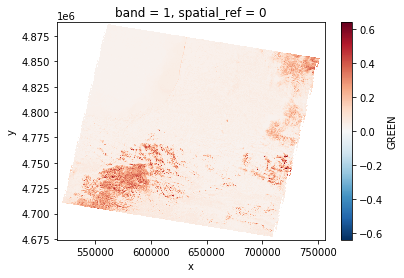

In [8]:
# The nan corresponds to the nodata you see on the footprint
# Plot a subsampled version
band_dict[GREEN][:, ::10, ::10].plot()

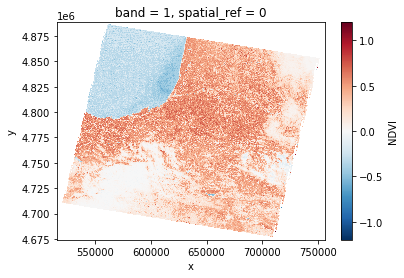

In [9]:
# Plot a subsampled version
band_dict[NDVI][:, ::10, ::10].plot()

In [10]:
# Plot a subsampled version
if HILLSHADE in band_dict:
    band_dict[HILLSHADE][:, ::10, ::10].plot()

In [11]:
# You can also stack those bands
stack = prod.stack(ok_bands)
stack

<xarray.DataArray 'GREEN NDVI CLOUDS' (z: 3, y: 7131, x: 7991)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
    spatial_ref  int64 0
  * x            (x) float64 5.16e+05 5.16e+05 5.161e+05 ... 7.557e+05 7.557e+05
  * y            (y) float64 4.888e+06 4.888e+06 ... 4.674e+06 4.674e+06
  * z            (z) MultiIndex
  - variable     (z) object 'GREEN' 'NDVI' 'CLOUDS'
  - band         (z) int64 1 1 1
Attributes:
    long_name:         GREEN NDVI CLOUDS
    sensor:            Landsat-5
    sensor_id:         L5
    product_path:      /home/data/DATA/PRODS/LANDSATS_COL2/LT05_L1TP_200030_2...
    product_name:      LT05_L1TP_200030_20111110_20200820_02_T1
    product_filename:  LT05_L1TP_200030_20111110_20200820_02_T1
    product_type:      TM
    acquisition_date:  20111110T103612
    condensed_name:    20111110T103612_L5_200030_TM

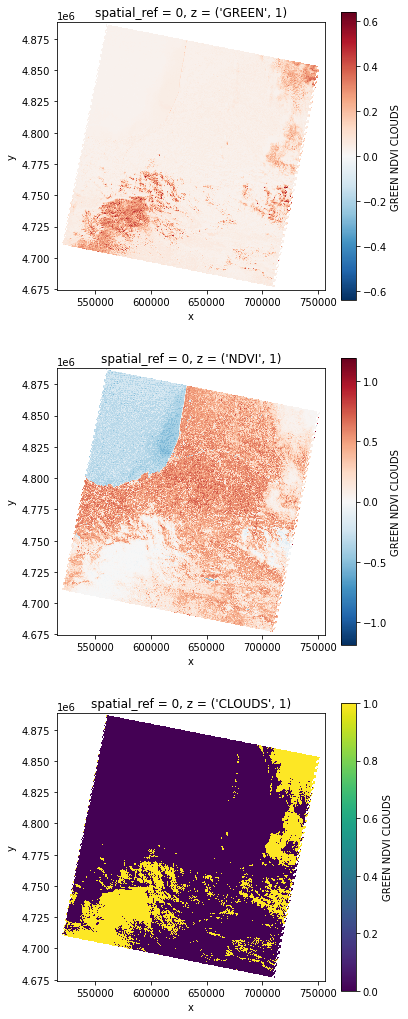

In [12]:
# Plot a subsampled version
nrows = len(stack)
fig, axes = plt.subplots(nrows=nrows, figsize=(2 * nrows, 6 * nrows), subplot_kw={"box_aspect": 1})  # Square plots
for i in range(nrows):
    stack[i, ::10, ::10].plot(x="x", y="y", ax=axes[i])
